In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000000

In [2]:
df = pd.read_csv("all_anonymized_2015_11_2017_03.csv")
df.head(5)

C:\Users\ARNAB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [3]:
df.drop(['date_created','date_last_seen','color_slug','body_type','stk_year','fuel_type','model','door_count','seat_count'],axis=1,inplace=True)

In [4]:
df.replace(to_replace='None', value= np.nan , inplace=True)

In [5]:
df.isna().sum()

maker                  518915
mileage                362584
manufacture_year       370578
engine_displacement    743414
engine_power           554877
transmission           741630
price_eur                   0
dtype: int64

In [6]:
df.dropna(inplace=True)

change_type = ['mileage','manufacture_year','engine_displacement','engine_power','price_eur']

df.loc[:,change_type] = df.loc[:,change_type].astype(int)

In [7]:
{'skoda','opel','ford','fiat','citroen','toyota','hyundai','nissan','volkswagen'}
sk = df["maker"]=="skoda"
op = df["maker"]=="opel"
fr = df["maker"]=="ford"
fa = df["maker"]=="fiat"
ct = df["maker"]=="citroen"
to = df["maker"]=="toyota"
hu = df["maker"]=="hyundai"
ns = df["maker"]=="nissan"
vw = df["maker"]=="volkswagen"
p_2k = df["manufacture_year"] > 1999
m_low = df['mileage'] < 300000
e_dlow = df['engine_displacement'] < 3000
e_plow = df['engine_power'] < 180
eur = df['price_eur'] < 100000
Xy = np.shape(df)
Xy = df[(sk | op | fr | ct | to | hu | ns | vw) & p_2k & m_low & e_dlow & e_plow & eur].copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
lex=LabelEncoder()

Xy.loc[:,'transmission'] = lex.fit_transform(Xy.loc[:,'transmission'])
Xy.loc[:,'maker'] = lex.fit_transform(Xy.loc[:,'maker'])

In [9]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
Xy.iloc[:,1:5] = rs.fit_transform(Xy.iloc[:,1:5])

In [10]:
X = Xy.iloc[:,:-1]
y = Xy.iloc[:,-1]

In [11]:
num = X.select_dtypes(exclude=['object']).copy()
num.head(10)

,maker,mileage,manufacture_year,engine_displacement,engine_power,transmission
0,1,0.542223,0.000000,0.665563,0.594595,1
1,5,0.482406,0.142857,0.665563,0.000000,1
3,5,0.231929,-1.000000,-0.658940,-0.918919,1
4,5,0.366414,-1.000000,-0.658940,-0.918919,1
5,5,0.462181,-1.142857,-0.658940,-1.108108,1
6,5,0.671174,-1.428571,-0.327815,-0.189189,1
8,5,0.179609,-1.142857,0.500000,0.000000,1
15,3,0.530020,-0.857143,1.493377,1.081081,0
18,5,1.483503,-0.857143,0.500000,0.405405,1
19,5,0.035458,-0.428571,-0.658940,-1.000000,1


In [12]:
d_num = ['manufacture_year','transmission']

c_num = []

for i in X.columns:
    if i not in d_num:
        c_num.append(i)

print(d_num)
print(c_num)

['manufacture_year', 'transmission']
['maker', 'mileage', 'engine_displacement', 'engine_power']


## Univariant

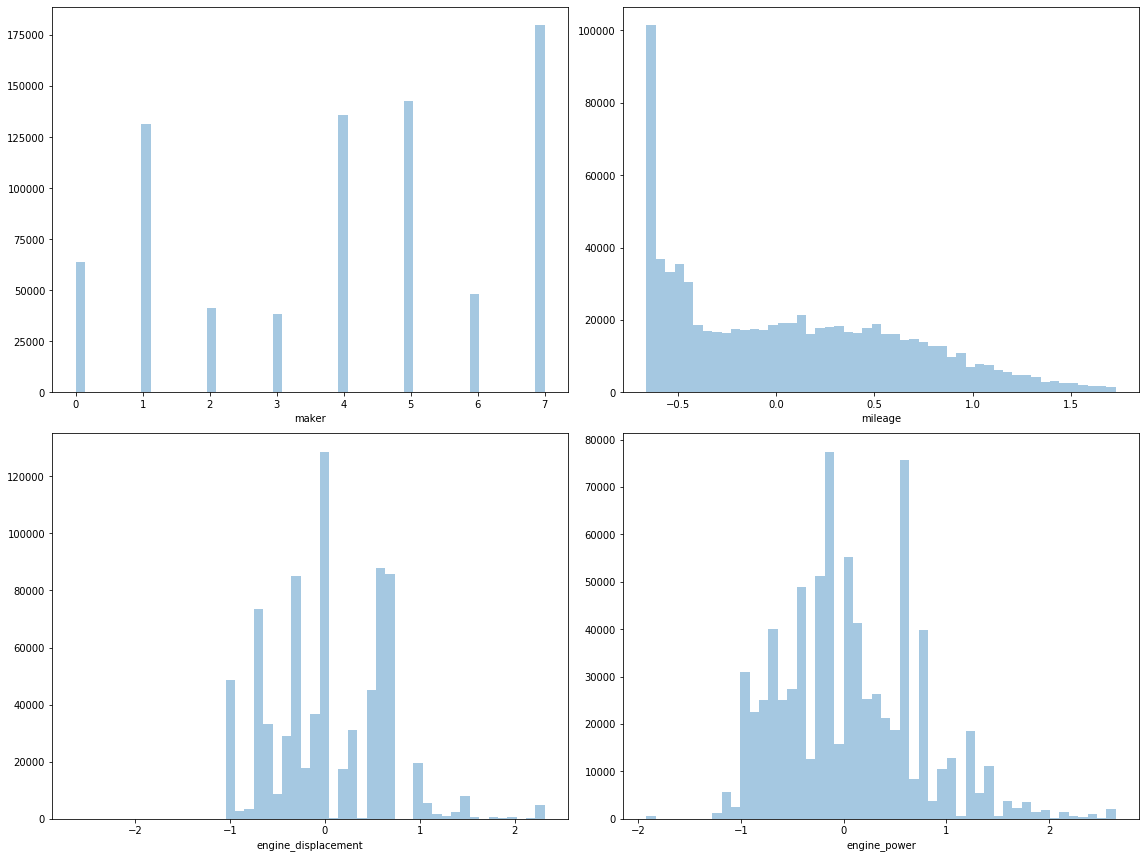

In [13]:
fig = plt.figure(figsize=(16,12))
for index,col in enumerate(c_num):
    plt.subplot(2,2,index+1)
    sns.distplot(num.loc[:,col],kde=False)
fig.tight_layout(pad=1.0)

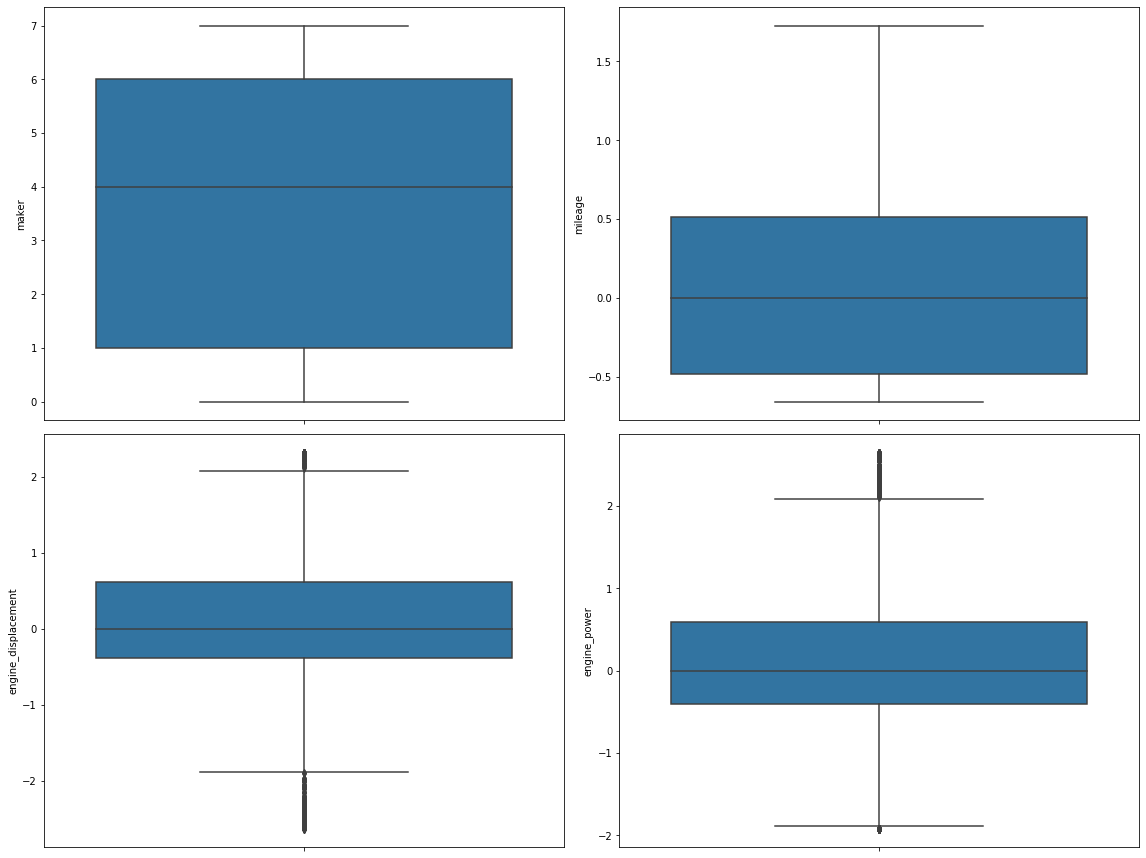

In [14]:
fig = plt.figure(figsize=(16,12))
for index,col in enumerate(c_num):
    plt.subplot(2,2,index+1)
    sns.boxplot(y=col,data=num)
fig.tight_layout(pad=1.0)

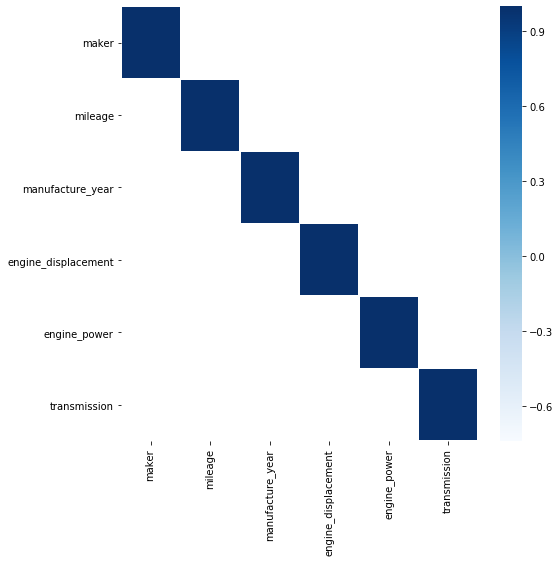

In [15]:
plt.figure(figsize=(8,8))
correlation = num.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

In [16]:
numeric_train = Xy.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['price_eur']].sort_values(['price_eur'], ascending=False)

,price_eur
price_eur,1.000000
manufacture_year,0.631561
engine_power,0.418206
engine_displacement,0.143426
maker,0.105275
transmission,-0.254638
mileage,-0.577411


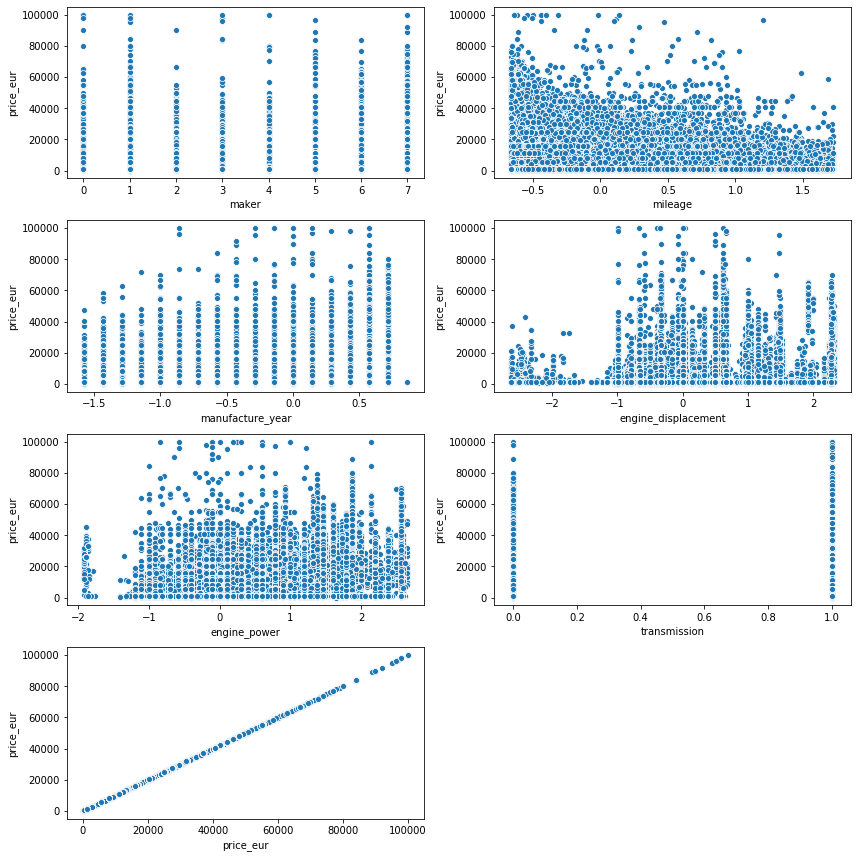

In [17]:
fig = plt.figure(figsize=(12,12))
for index in range(len(numeric_train.columns)):
    plt.subplot(4,2,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='price_eur', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

In [18]:
import statsmodels.api as sm

X = sm.add_constant(X)
X_opt = X.iloc[:, [0,1,2,3,4,5,6]]
reg_OLS = sm.OLS(y,X_opt).fit()
reg_OLS.summary()

C:\Users\ARNAB\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 1.732e+05
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:05:51   Log-Likelihood:            -7.7807e+06
No. Observations:              781003   AIC:                         1.556e+07
Df Residuals:                  780996   BIC:                         1.556e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.046e+04     19.398    539.382      0.000    1.04e+04    1.05e+04
maker                 270.0787      2.481    108.865      0.000     265.216     274.941
mileage             -5352.5325     15.551   -344.186      0.000   -5383.012   -5322.053
manufacture_year     3810.1199     14.123    269.784      0.000    3782.440    3837.800
engine_displacement  2215.4999     15.658    141.494      0.000    2184.811    2246.189
engine_power         2491.5810     13.881    179.498      0.000    2464.375    2518.787
transmission        -1558.1980     17.184    -90.677      0.000   -1591.878   -1524.518
==============================================================================
Omnibus:                   136045.549   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2902420.682
Skew:                           0.199   Prob(JB):                         0.00
Kurtosis:                      12.436   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
X_poly=pr.fit_transform(X)
pr.fit(X_poly,y)

lr_p=LinearRegression()
lr_p.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

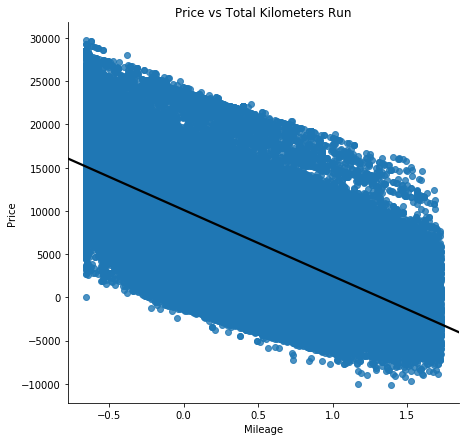

In [22]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.mileage, y=reg.predict(X), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Total Kilometers Run')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

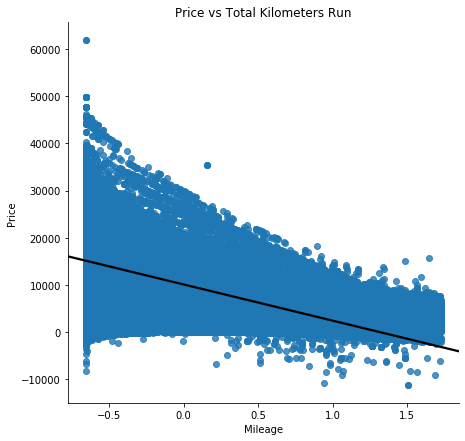

In [23]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.mileage, y=lr_p.predict(pr.fit_transform(X)), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Total Kilometers Run')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

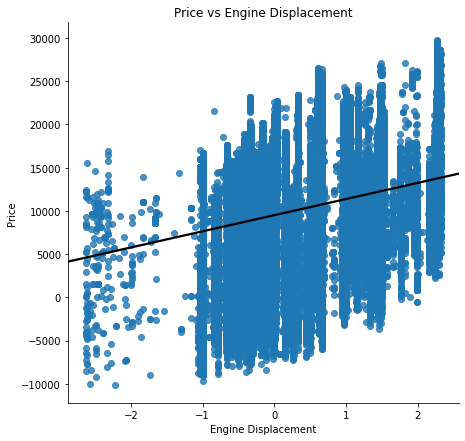

In [24]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.engine_displacement, y=reg.predict(X), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Engine Displacement')
plt.xlabel('Engine Displacement')
plt.ylabel('Price')
plt.show()

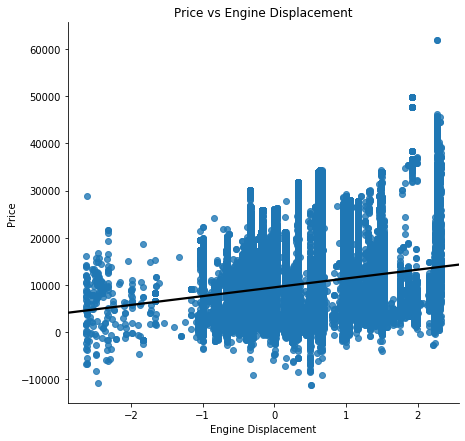

In [25]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.engine_displacement, y=lr_p.predict(pr.fit_transform(X)), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Engine Displacement')
plt.xlabel('Engine Displacement')
plt.ylabel('Price')
plt.show()

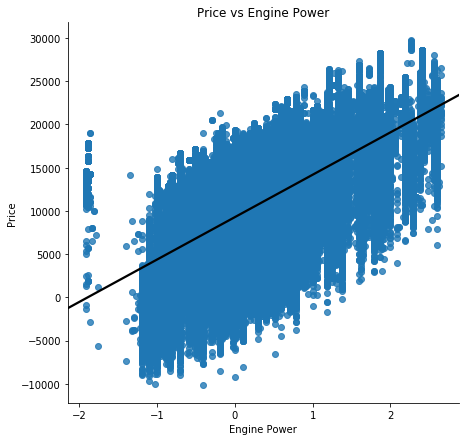

In [26]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.engine_power, y=reg.predict(X), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Engine Power')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.show()

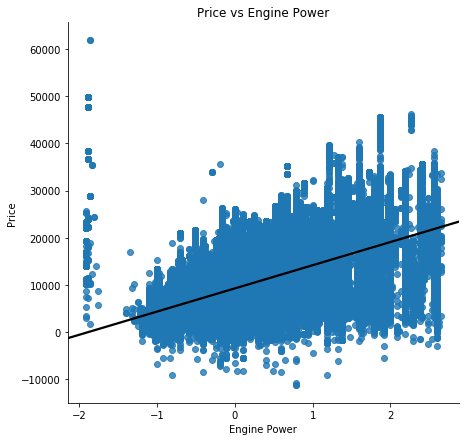

In [27]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.engine_power, y=lr_p.predict(pr.fit_transform(X)), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Engine Power')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.show()

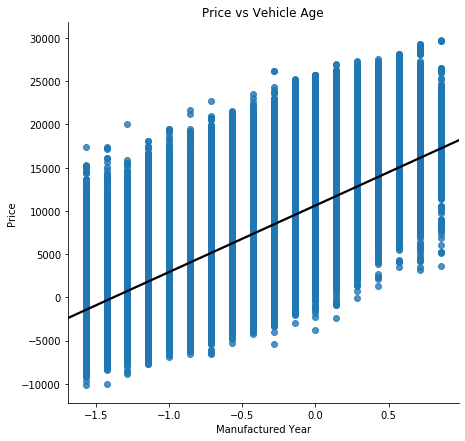

In [28]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.manufacture_year, y=reg.predict(X), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Vehicle Age')
plt.xlabel('Manufactured Year')
plt.ylabel('Price')
plt.show()

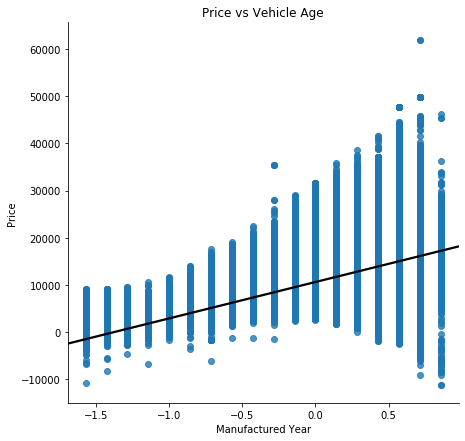

In [29]:
fig = plt.figure(figsize=(7,7))
sns.regplot(x= X.manufacture_year, y=lr_p.predict(pr.fit_transform(X)), data=X, line_kws={'color':'black'})
sns.despine()
plt.title('Price vs Vehicle Age')
plt.xlabel('Manufactured Year')
plt.ylabel('Price')
plt.show()

In [57]:
plt.scatter(X.mileage,y,color='red')
plt.plot(X.mileage,lr_p.predict(pr.fit_transform(X)),color='blue')
plt.title('Price vs Total Kilometers Run')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>